In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})

In [31]:
dataset=pd.read_csv('house_data_prepared')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,Total_power_consumed
0,2010-02-19,12:55:00,0.332,0.074,241.44,1.4,0.0,1.0,0.0,2010,2,19,1.0
1,2008-09-20,01:19:00,0.624,0.128,242.91,2.6,0.0,0.0,0.0,2008,9,20,0.0
2,2007-02-28,13:28:00,0.214,0.000,240.92,0.8,0.0,0.0,0.0,2007,2,28,0.0
3,2010-10-27,00:27:00,0.876,0.238,246.75,3.6,0.0,0.0,1.0,2010,10,27,1.0
4,2007-07-14,14:50:00,0.638,0.198,244.19,3.4,2.0,1.0,0.0,2007,7,14,3.0


In [32]:
continuous_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O' and dataset[feature].dtype!='int64']
continuous_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Total_power_consumed']

<AxesSubplot:>

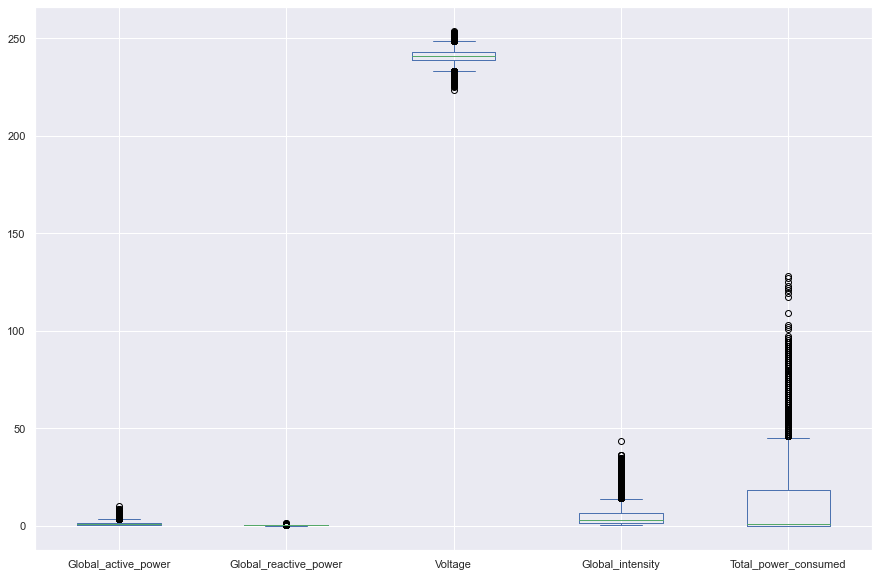

In [33]:
### Checking for Outliers 

dataset[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']].plot.box()

In [34]:
df1=dataset.copy()

In [35]:
## removing outliers using IQR method


def remove_outliers(col):
    '''Inter Quartile range'''
    
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    #return df1[df1[col] > upper_limit]

In [36]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

Upper limit 3.333
Lower limit -1.507


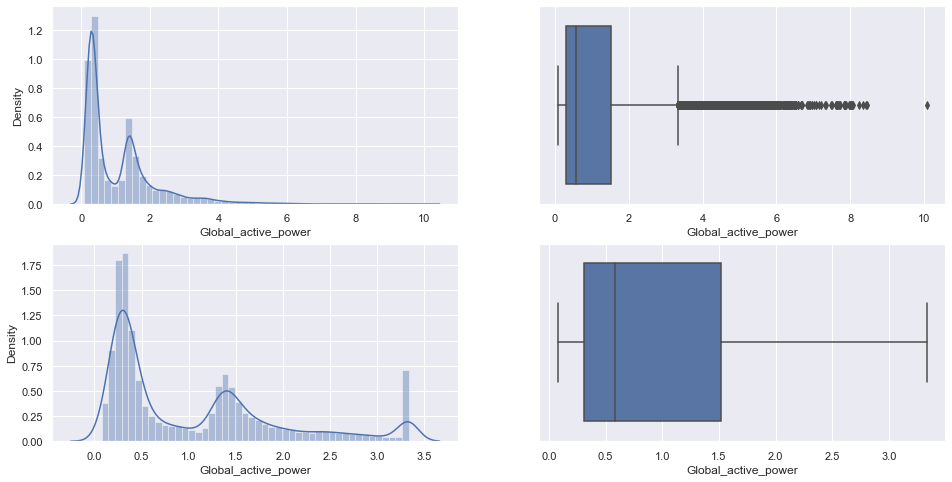

Upper limit 0.41300000000000003
Lower limit -0.17100000000000004


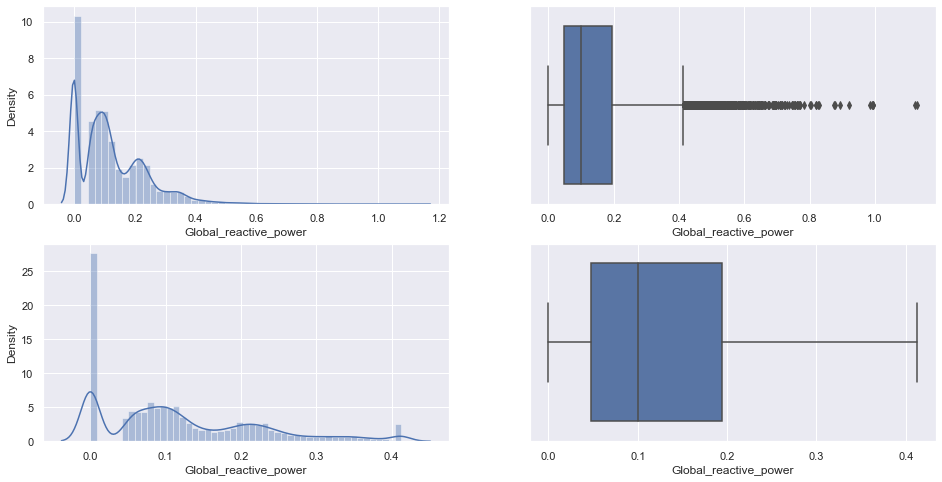

Upper limit 248.71499999999997
Lower limit 233.15500000000003


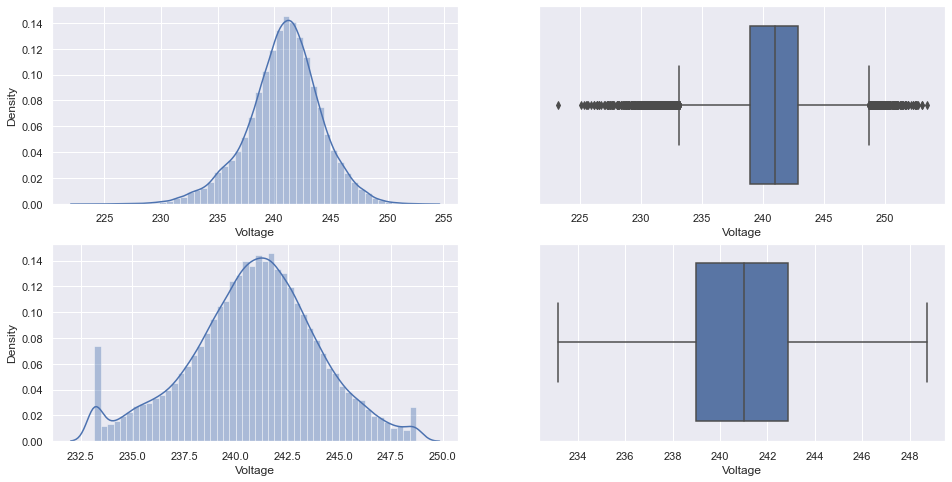

Upper limit 13.9
Lower limit -6.1


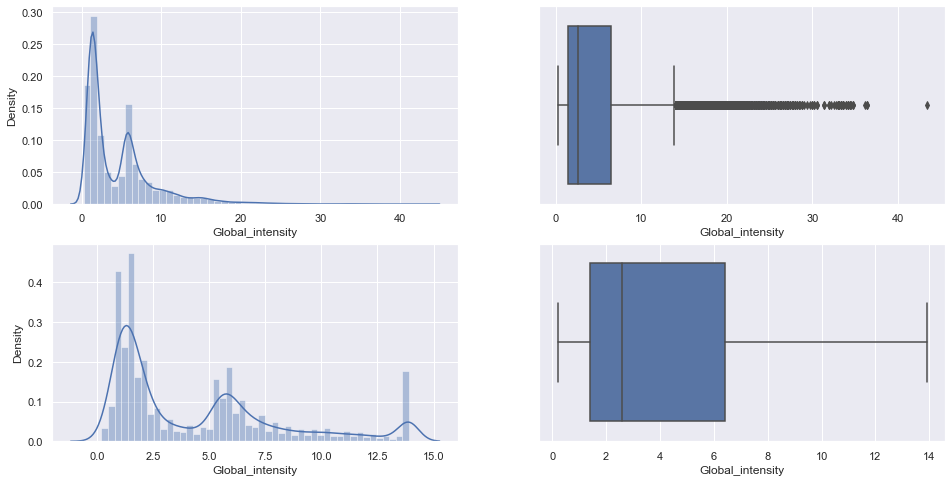

Upper limit 45.0
Lower limit -27.0


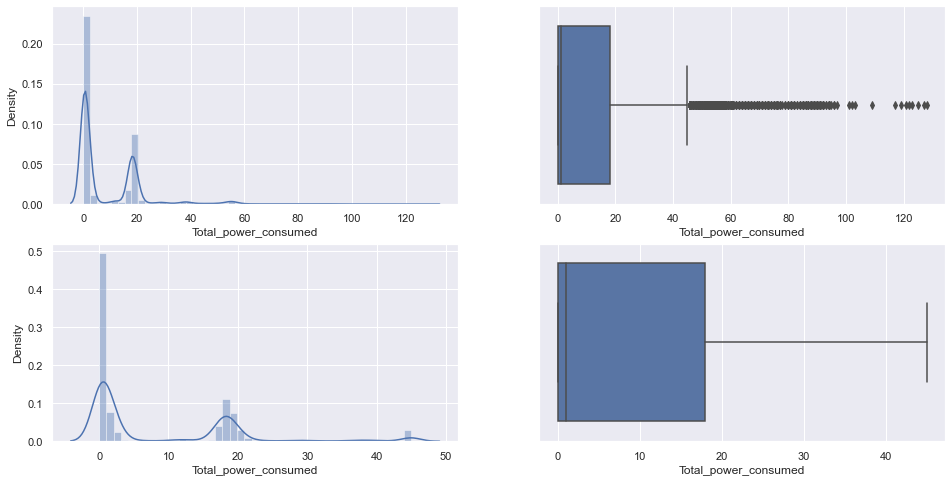

In [37]:
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']:
    remove_outliers(feature)
    create_comparison_plot(dataset,df1,feature)

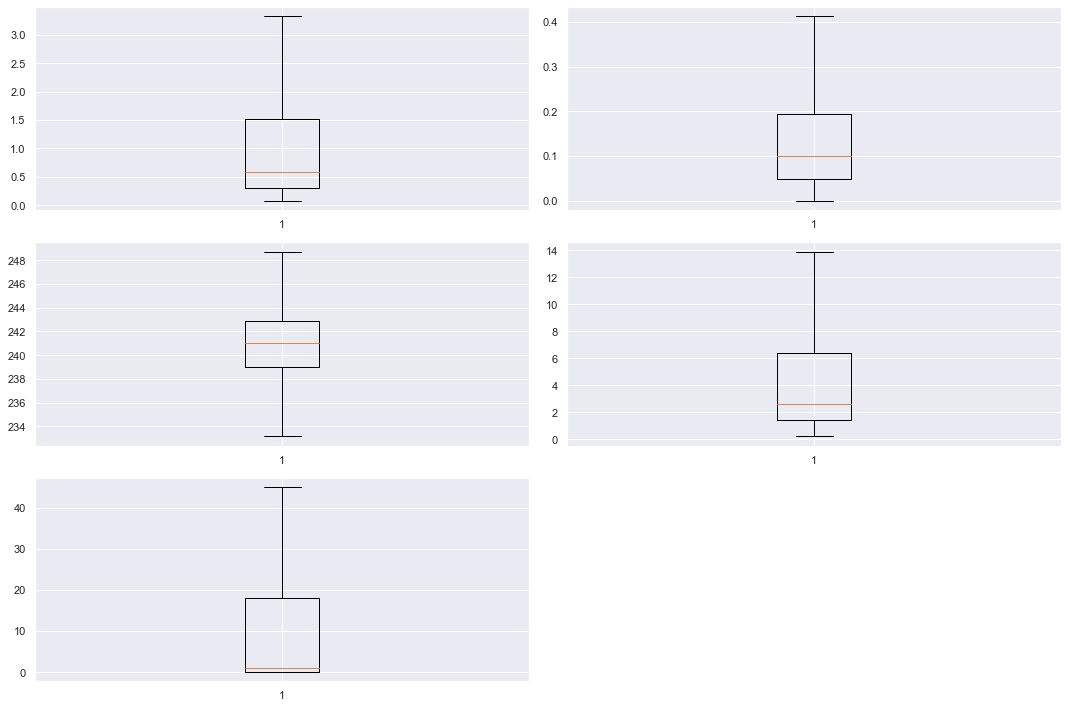

In [38]:
i=1
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']:
    plt.subplot(3,2,i)
    i+=1
    plt.boxplot(df1[feature])
    plt.xlabel=feature
    plt.tight_layout()

In [39]:
dataset.skew()

Global_active_power      1.843464
Global_reactive_power    1.286967
Voltage                 -0.349116
Global_intensity         1.907399
Sub_metering_1           5.777819
Sub_metering_2           7.177573
Sub_metering_3           0.737705
year                     0.003227
month                    0.000773
day                      0.012114
Total_power_consumed     2.282907
dtype: float64

In [40]:
df1.skew()

Global_active_power      1.067713
Global_reactive_power    0.832727
Voltage                 -0.200449
Global_intensity         1.079208
Sub_metering_1           5.777819
Sub_metering_2           7.177573
Sub_metering_3           0.737705
year                     0.003227
month                    0.000773
day                      0.012114
Total_power_consumed     1.419817
dtype: float64

- We can see that the skew has reduced in `Global_active_power, Global_reactive_power,Voltage, Global_intensity, Total_power_consumed`

- We are dropping Sub_metering_1,Sub_metering_2,Sub_metering_3 because we created sum of these features as Total power consumed

In [41]:
df1.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],inplace=True,axis=1)

### As we can see no ouliers in the dataset

In [42]:
df1.to_csv('outlier_handled')